In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import circulant
# load the numpy txt from a file 
data = np.loadtxt('data/curves/dino_noisy.txt')
#data = np.vstack([data, [data[0, 0], data[0, 1]]]) # close the curve
#data_not = np.loadtxt('data/curves/dino.txt')
#true_data = np.loadtxt('data/curves/dino.txt') 
#true_data = np.vstack([true_data, [true_data[0, 0], true_data[0, 1]]])
from IPython.display import display, clear_output
#len(data)


def smoothing_equation_1_13(data, LAMBDA=0.5, BETA=0.5, true_data=None):
    # A matrix 
    N = data.shape[0]
    A = np.zeros(N)
    A[0] = -2
    A[1] = 1
    A[-1] = 1
    A = circulant(L)

    # B matrix 
    B = np.zeros(N)
    B[0] = -6
    B[1] = 4
    B[2] = -1
    B[-1] = 4
    B[-2] = -1
    B = circulant(B)

    #print(B)

    I = np.eye(N)
    X_new = np.linalg.inv(I - LAMBDA * L - BETA * B) @ data

    # Plot results
    plt.figure()
    plt.plot(X_new[:, 0], X_new[:, 1], '-', label="Smoothed Curve")

    if true_data is not None:
        plt.plot(true_data[:, 0], true_data[:, 1], '-', label="Ground Truth", alpha=0.7)

    plt.title(rf"Smoothing with $\lambda={LAMBDA}$ and $\beta={BETA}$")
    plt.legend()
    plt.show()


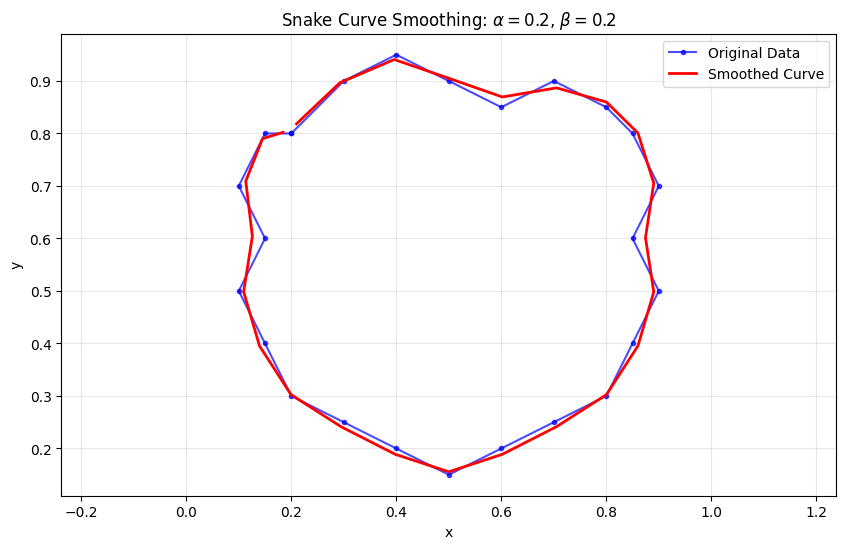

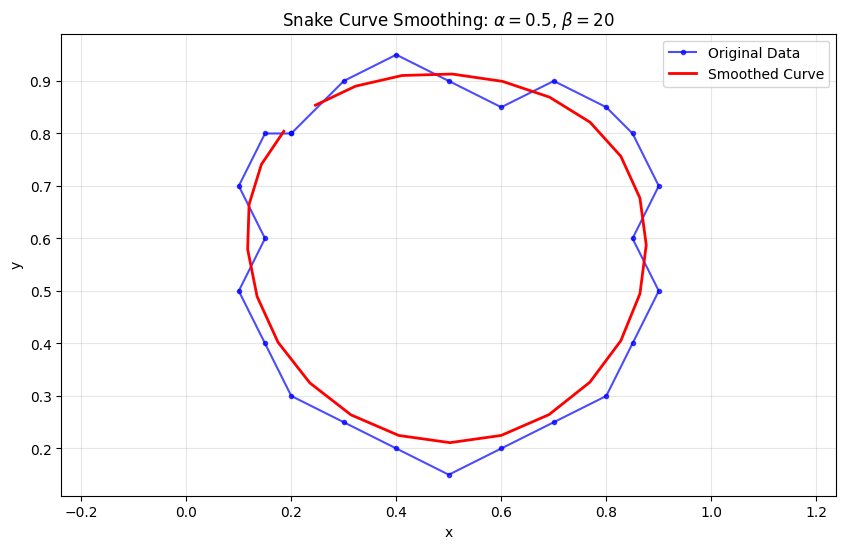

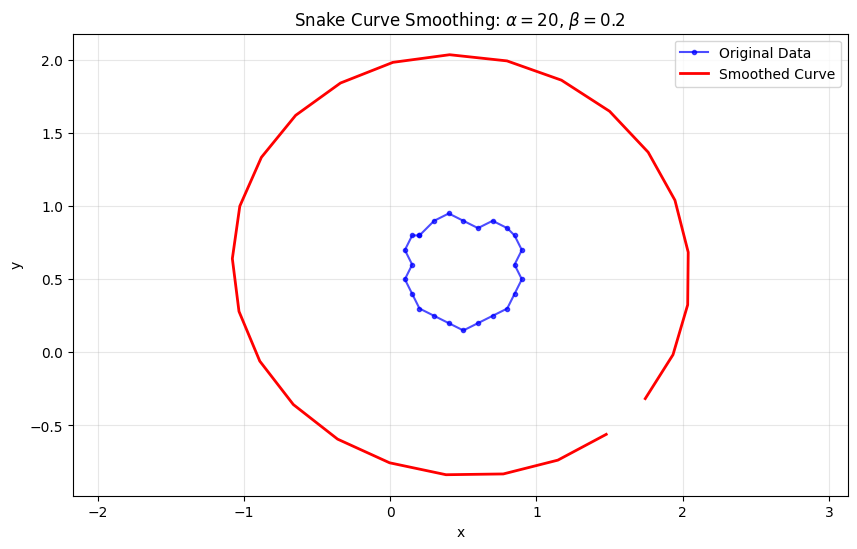

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant

def smoothing_equation_1_13(data, alpha=0.5, beta=0.5, true_data=None):
    """
    Smooth a discrete curve using the snakes internal energy formulation.
    
    Parameters:
    -----------
    data : ndarray, shape (N, 2)
        Input curve points as [x, y] coordinates
    alpha : float
        Weight for elasticity term (first-order derivative regularization)
    beta : float  
        Weight for rigidity term (second-order derivative regularization)
    true_data : ndarray, optional
        Ground truth curve for comparison plotting
    
    Returns:
    --------
    X_new : ndarray
        Smoothed curve points
    """
    N = data.shape[0]
    
    # Second derivative operator matrix (elasticity term)
    # Corresponds to filter [1, -2, 1] for discrete second derivative
    A_coeffs = np.zeros(N)
    A_coeffs[0] = -2   # center coefficient
    A_coeffs[1] = 1    # forward coefficient  
    A_coeffs[-1] = 1   # backward coefficient (due to circulant structure)
    A = circulant(A_coeffs)
    
    # Fourth derivative operator matrix (rigidity term)  
    # Corresponds to filter [-1, 4, -6, 4, -1] for discrete fourth derivative
    B_coeffs = np.zeros(N)
    B_coeffs[0] = 6    # center coefficient (note: sign will be handled by negative beta)
    B_coeffs[1] = -4   # ±1 positions
    B_coeffs[2] = 1    # ±2 positions
    B_coeffs[-1] = -4  # -1 position (circulant)
    B_coeffs[-2] = 1   # -2 position (circulant)
    B = circulant(B_coeffs)
    
    # Identity matrix
    I = np.eye(N)
    
    # Solve the smoothing equation: (I + α*A + β*B) * X_new = data
    # This corresponds to the backward Euler discretization
    system_matrix = I + alpha * A + beta * B
    X_new = np.linalg.solve(system_matrix, data)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data[:, 0], data[:, 1], 'b-o', label="Original Data", markersize=3, alpha=0.7)
    plt.plot(X_new[:, 0], X_new[:, 1], 'r-', label="Smoothed Curve", linewidth=2)
    
    
    plt.title(rf"Snake Curve Smoothing: $\alpha={alpha}$, $\beta={beta}$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()
    
    return X_new

# Example usage with a noisy curve
def create_test_data():
    points = np.array([
        [0.2, 0.8],   # top left area
        [0.3, 0.9],   # top protrusion
        [0.4, 0.95],  
        [0.5, 0.9],
        [0.6, 0.85],
        [0.7, 0.9],   # top right protrusion
        [0.8, 0.85],
        [0.85, 0.8],
        [0.9, 0.7],   # right side
        [0.85, 0.6],
        [0.9, 0.5],
        [0.85, 0.4],
        [0.8, 0.3],   # bottom right
        [0.7, 0.25],
        [0.6, 0.2],
        [0.5, 0.15],  # bottom
        [0.4, 0.2],
        [0.3, 0.25],
        [0.2, 0.3],   # bottom left
        [0.15, 0.4],
        [0.1, 0.5],   # left side indentation
        [0.15, 0.6],
        [0.1, 0.7],   # left side
        [0.15, 0.8],
        [0.2, 0.8]    # close the loop
    ])
    return points, noisy_curve * 0.5 + np.random.normal(0, 0.05, noisy_curve.shape)

# Demonstrate the smoothing with different parameter values
if __name__ == "__main__":
    # Create test data
    noisy_curve, clean_curve = create_test_data()
    
    # Test different parameter combinations
    parameter_sets = [
        (0.2, 0.2),   # Light smoothing
        (0.5, 20),
        (20, 0.2)# Medium smoothing  
    ]
    
    for alpha, beta in parameter_sets:
        smoothed = smoothing_equation_1_13(noisy_curve, alpha=alpha, beta=beta, true_data=clean_curve)